<a href="https://colab.research.google.com/github/Skiiidoodle/Lung_cancer_prediction_ver1/blob/main/Lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:

df = pd.read_csv('survey_lung_cancer.csv')
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of cols
print(df.head())



   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               2        2              1   
1       0   74        2               1        1              1   
2       1   59        1               1        1              2   
3       0   63        2               2        2              1   
4       1   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

In [4]:
print(f"Number of rows: {count_row}")
print(f"Number of columns: {count_col}")

Number of rows: 55394
Number of columns: 16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55394 entries, 0 to 55393
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 55394 non-null  int64
 1   AGE                    55394 non-null  int64
 2   SMOKING                55394 non-null  int64
 3   YELLOW_FINGERS         55394 non-null  int64
 4   ANXIETY                55394 non-null  int64
 5   PEER_PRESSURE          55394 non-null  int64
 6   CHRONIC DISEASE        55394 non-null  int64
 7   FATIGUE                55394 non-null  int64
 8   ALLERGY                55394 non-null  int64
 9   WHEEZING               55394 non-null  int64
 10  ALCOHOL CONSUMING      55394 non-null  int64
 11  COUGHING               55394 non-null  int64
 12  SHORTNESS OF BREATH    55394 non-null  int64
 13  SWALLOWING DIFFICULTY  55394 non-null  int64
 14  CHEST PAIN             55394 non-null  int64
 15  LUNG_CANCER            55394 non-nul

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df.duplicated().sum()

893

In [9]:
df.nunique()

GENDER                    2
AGE                      64
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [14]:
df = df.drop_duplicates(keep = False) # Remove all duplicated row
print(df.duplicated().sum())

0


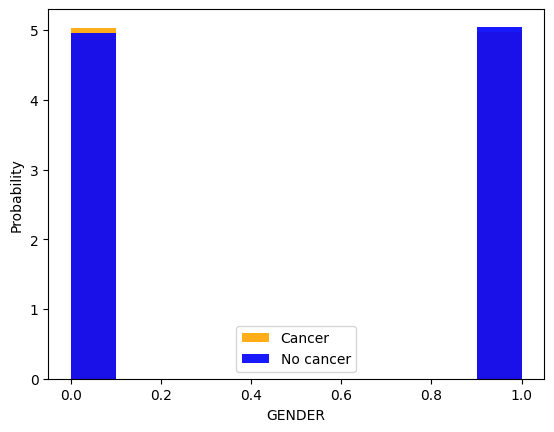

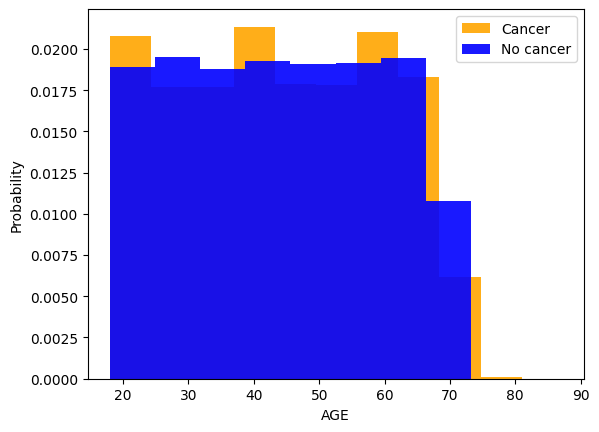

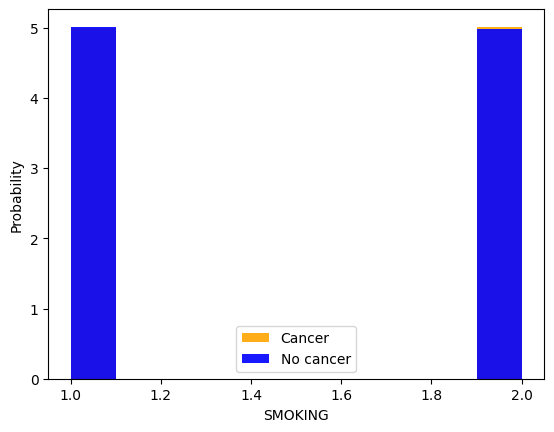

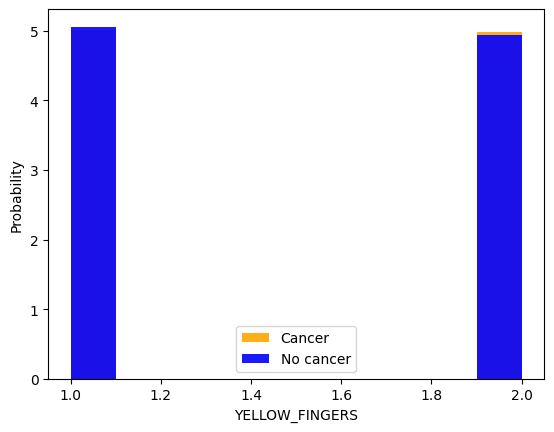

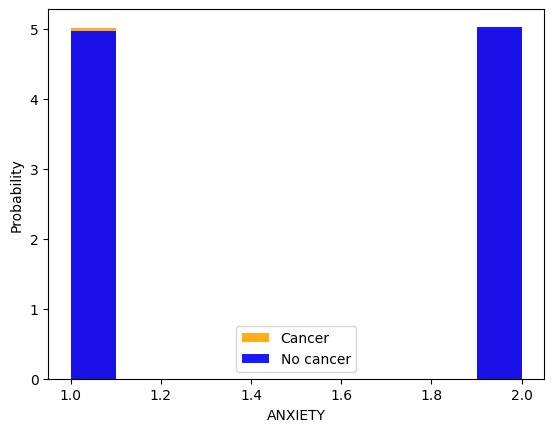

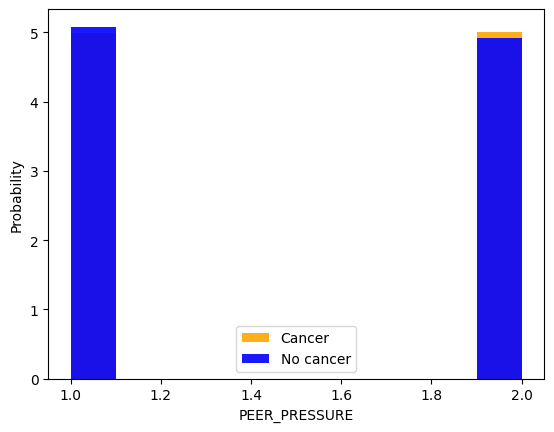

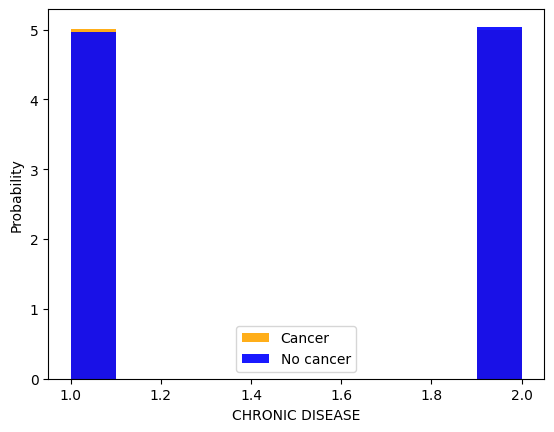

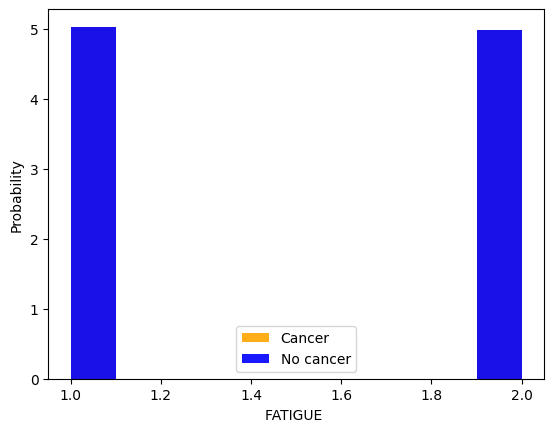

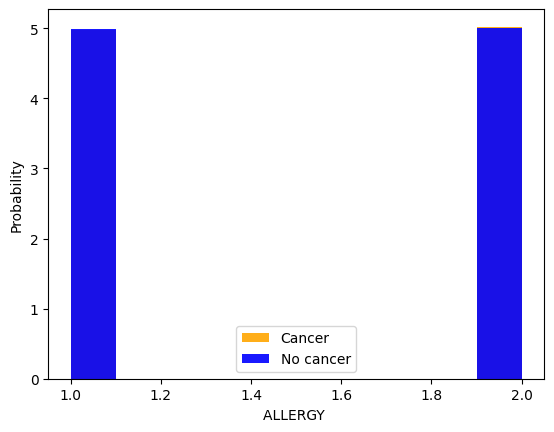

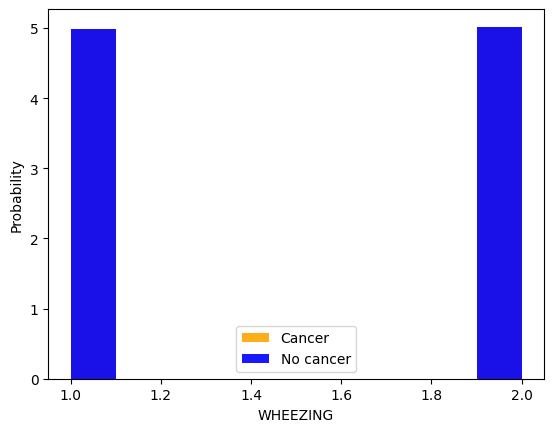

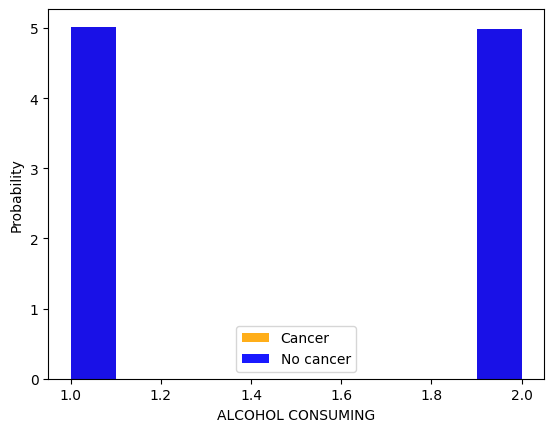

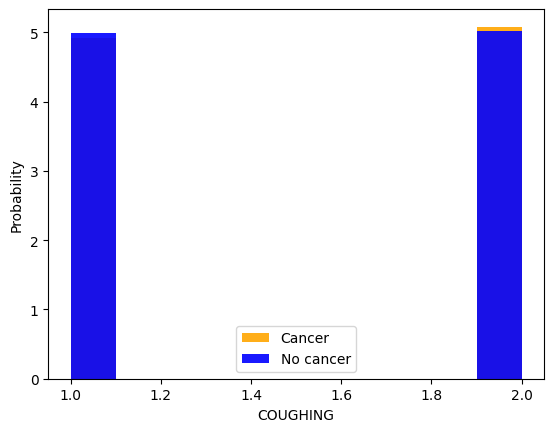

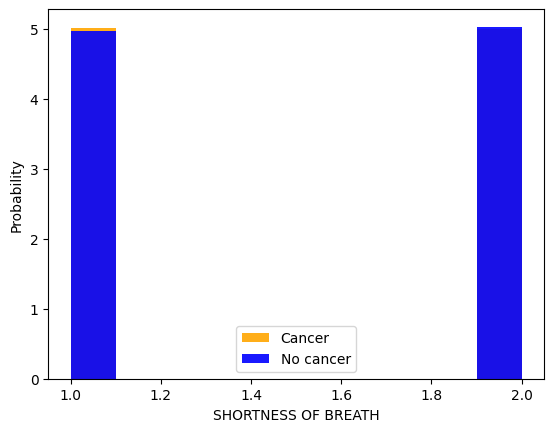

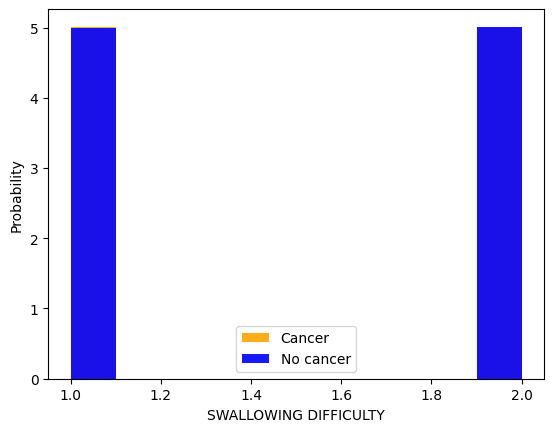

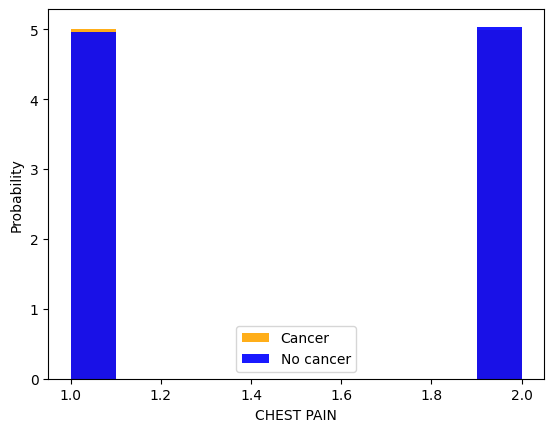

In [15]:
for label in df.columns[:-1]:
  plt.hist(df[df["LUNG_CANCER"]==1][label], color='orange', label='Cancer', alpha=0.9, density=True) # 1 == YES
  plt.hist(df[df["LUNG_CANCER"]==2][label], color='blue', label='No cancer', alpha=0.9, density=True) # 2 == NO
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['LUNG_CANCER'])
y=df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

K-Nearest Neighbor

In [18]:
#Optimal K value formula for KNN
K = math.sqrt(count_row)/2  #Always try to keep the K value odd so that there's no tie when choosing class
#Training the model with K
knn_Model = KNeighborsClassifier(n_neighbors = int(K))
knn_Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=117)

In [19]:
#Testing the model
y_pred = knn_Model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.51      0.51      8131
           2       0.49      0.49      0.49      7955

    accuracy                           0.50     16086
   macro avg       0.50      0.50      0.50     16086
weighted avg       0.50      0.50      0.50     16086



Decision Tree Classifier

In [21]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50      8131
           2       0.49      0.49      0.49      7955

    accuracy                           0.49     16086
   macro avg       0.49      0.49      0.49     16086
weighted avg       0.49      0.49      0.49     16086



Random Forest Classifier

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50      8131
           2       0.49      0.49      0.49      7955

    accuracy                           0.49     16086
   macro avg       0.49      0.49      0.49     16086
weighted avg       0.49      0.49      0.49     16086



Naive Bayes Classifier

In [27]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.54      0.52      8131
           2       0.49      0.45      0.47      7955

    accuracy                           0.50     16086
   macro avg       0.49      0.49      0.49     16086
weighted avg       0.49      0.50      0.49     16086



Logistic Regression

In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.54      0.52      8131
           2       0.49      0.45      0.47      7955

    accuracy                           0.49     16086
   macro avg       0.49      0.49      0.49     16086
weighted avg       0.49      0.49      0.49     16086



Gradient Boosting Classifier

In [33]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [34]:
y_pred = gradient_booster.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50      8131
           2       0.49      0.49      0.49      7955

    accuracy                           0.50     16086
   macro avg       0.50      0.50      0.50     16086
weighted avg       0.50      0.50      0.50     16086



SVM Classifier

In [35]:
clf = SVC(kernel='linear')

In [36]:
clf.fit(X_train, y_train)


In [ ]:
y_pred = clf.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67      5534
           2       0.00      0.00      0.00      5545

    accuracy                           0.50     11079
   macro avg       0.25      0.50      0.33     11079
weighted avg       0.25      0.50      0.33     11079



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
